[*********************100%%**********************]  1 of 1 completed


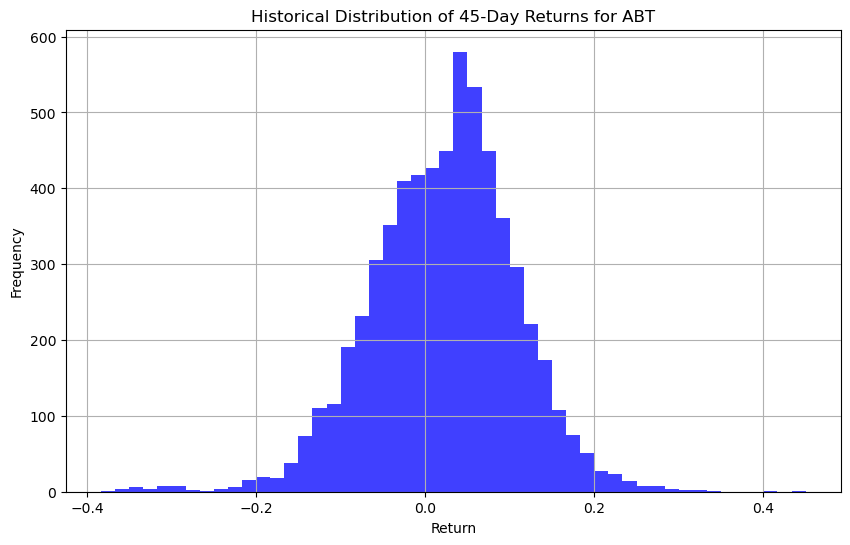

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def get_historical_returns(ticker, interval=5):
    # Fetch historical data for the stock ticker
    stock_data = yf.download(ticker, start="2000-01-01", end="2024-12-31")
    
    # Calculate the percentage change for each day
    stock_data['Return'] = stock_data['Adj Close'].pct_change()
    
    # Calculate returns over X-day intervals
    stock_data[f'{interval}-Day Return'] = stock_data['Adj Close'].pct_change(periods=interval)
    
    # Drop NaN values that arise from pct_change()
    stock_data.dropna(inplace=True)
    
    return stock_data

def plot_return_distribution(stock_data, interval=5):
    # Plot the histogram of X-day returns
    plt.figure(figsize=(10, 6))
    stock_data[f'{interval}-Day Return'].hist(bins=50, alpha=0.75, color='blue')
    plt.title(f'Historical Distribution of {interval}-Day Returns for {ticker}')
    plt.xlabel('Return')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Example Usage
ticker = 'ABT'  # Replace with any stock ticker
interval = 45  # X-day interval
stock_data = get_historical_returns(ticker, interval)
plot_return_distribution(stock_data, interval)


In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def get_historical_returns(ticker, interval=5):
    # Fetch historical data for the stock ticker
    stock_data = yf.download(ticker, start="2000-01-01", end="2024-12-31")
    
    # Calculate the percentage change for each day
    stock_data['Return'] = stock_data['Adj Close'].pct_change()
    
    # Calculate returns over X-day intervals
    stock_data[f'{interval}-Day Return'] = stock_data['Adj Close'].pct_change(periods=interval)
    
    # Drop NaN values that arise from pct_change()
    stock_data.dropna(inplace=True)
    
    return stock_data

def calculate_probability(stock_data, interval, d):
    # Get X-day returns
    returns = stock_data[f'{interval}-Day Return']
    
    # Calculate the probability of return being less than d
    prob = np.mean(returns < d)
    
    return prob

# Example Usage
ticker = 'AAPL'  # Replace with any stock ticker
interval = 45  # X-day interval
d = -0.1  # Replace with the return threshold you're interested in (e.g., 1%)

stock_data = get_historical_returns(ticker, interval)
probability = calculate_probability(stock_data, interval, d)

print(f"The probability that the {interval}-day return is less than {d} is {probability:.4f}")


[*********************100%%**********************]  1 of 1 completed

The probability that the 45-day return is less than -0.1 is 0.1382


In [9]:
sum(stock_data['45-Day Return']<-0.1)/len(stock_data['45-Day Return'])

0.1381664499349805

In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def get_historical_returns(ticker, interval=5):
    # Fetch historical data for the stock ticker
    stock_data = yf.download(ticker, start="2000-01-01", end="2024-12-31")
    
    # Calculate returns over X-day intervals
    stock_data[f'{interval}-Day Return'] = stock_data['Adj Close'].pct_change(periods=interval)
    
    # Drop NaN values that arise from pct_change()
    stock_data.dropna(inplace=True)
    
    return stock_data[f'{interval}-Day Return']

def calculate_probability_less_than_d(returns, d):
    # Calculate the empirical CDF for the returns
    sorted_returns = np.sort(returns)
    cdf_values = np.arange(1, len(sorted_returns) + 1) / len(sorted_returns)
    
    # Find the index where the return is just less than or equal to d
    index = np.searchsorted(sorted_returns, d, side='right') - 1
    
    # Calculate the probability
    if index < 0:
        probability = 0.0
    else:
        probability = cdf_values[index]
    
    return probability

# Example Usage
ticker = 'AAPL'  # Replace with any stock ticker
interval = 45  # X-day interval
d = -0.1  # The return value to check against

# Get historical returns
historical_returns = get_historical_returns(ticker, interval)

# Calculate the probability that the return is less than d
probability = calculate_probability_less_than_d(historical_returns, d)

print(f"The probability that the {interval}-day return is less than {d:.2%} is approximately {probability:.2%}")


[*********************100%%**********************]  1 of 1 completed

The probability that the 45-day return is less than -10.00% is approximately 13.82%
